## Import Libraries

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load Dataset

In [4]:
df = pd.read_csv('insurance.csv')

## Data Analysis

In [5]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [6]:
#Rename columns for better understandability
df = df.rename(columns = {'charges':'Medical_Fees'})
df = df.rename(columns = {'smoker':'Is_Smoker'})

In [7]:
df.head(10)

,age,sex,bmi,children,Is_Smoker,region,Medical_Fees
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           1338 non-null   int64  
 1   sex           1338 non-null   object 
 2   bmi           1338 non-null   float64
 3   children      1338 non-null   int64  
 4   Is_Smoker     1338 non-null   object 
 5   region        1338 non-null   object 
 6   Medical_Fees  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
# Convert into 0's and 1's using One Hot encoding
df = pd.get_dummies(df, columns=['sex'], prefix='sex', dtype='uint8')
df = pd.get_dummies(df, columns=['Is_Smoker'], prefix='Smokes', dtype='uint8')

In [10]:
df.head()

,age,bmi,children,region,Medical_Fees,sex_female,sex_male,Smokes_no,Smokes_yes
0,19,27.900,0,southwest,16884.92400,1,0,0,1
1,18,33.770,1,southeast,1725.55230,0,1,1,0
2,28,33.000,3,southeast,4449.46200,0,1,1,0
3,33,22.705,0,northwest,21984.47061,0,1,1,0
4,32,28.880,0,northwest,3866.85520,0,1,1,0


In [11]:
# Drop an extra column to reduce any side effects on the column
df.drop('Smokes_no', axis = 1, inplace = True)
df.drop('sex_male', axis = 1, inplace = True)

In [12]:
df.head()

,age,bmi,children,region,Medical_Fees,sex_female,Smokes_yes
0,19,27.900,0,southwest,16884.92400,1,1
1,18,33.770,1,southeast,1725.55230,0,0
2,28,33.000,3,southeast,4449.46200,0,0
3,33,22.705,0,northwest,21984.47061,0,0
4,32,28.880,0,northwest,3866.85520,0,0


In [13]:
# Check values under region
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

#### Convert Region to Numbers:

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()
le.fit(df['region'])
df['Region'] = le.transform(df['region'])

In [16]:
df.head(10)


,age,bmi,children,region,Medical_Fees,sex_female,Smokes_yes,Region
0,19,27.900,0,southwest,16884.92400,1,1,3
1,18,33.770,1,southeast,1725.55230,0,0,2
2,28,33.000,3,southeast,4449.46200,0,0,2
3,33,22.705,0,northwest,21984.47061,0,0,1
4,32,28.880,0,northwest,3866.85520,0,0,1
5,31,25.740,0,southeast,3756.62160,1,0,2
6,46,33.440,1,southeast,8240.58960,1,0,2
7,37,27.740,3,northwest,7281.50560,1,0,1
8,37,29.830,2,northeast,6406.41070,0,0,0
9,60,25.840,0,northwest,28923.13692,1,0,1


In [18]:
df.drop('region', axis = 1, inplace = True)

In [19]:
df.head()

,age,bmi,children,Medical_Fees,sex_female,Smokes_yes,Region
0,19,27.900,0,16884.92400,1,1,3
1,18,33.770,1,1725.55230,0,0,2
2,28,33.000,3,4449.46200,0,0,2
3,33,22.705,0,21984.47061,0,0,1
4,32,28.880,0,3866.85520,0,0,1


#### Check Correlation

<Axes: >

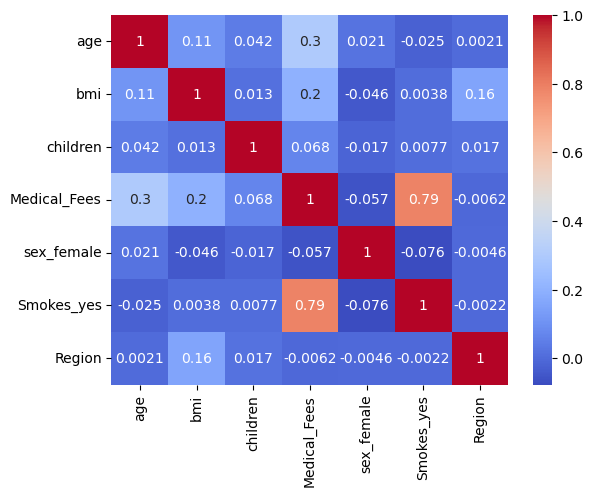

In [21]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')  # Customize as needed

<Axes: xlabel='Medical_Fees', ylabel='Smokes_yes'>

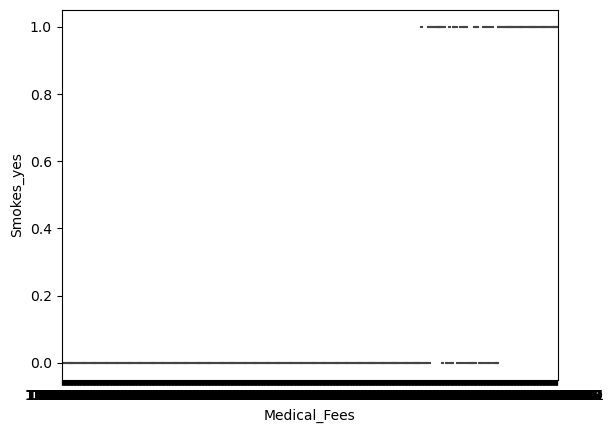

In [23]:
sns.violinplot(
    x = "Medical_Fees",
    y = "Smokes_yes",
    showmeans=True,
    data=df
)

In [24]:
import matplotlib.pyplot as plt

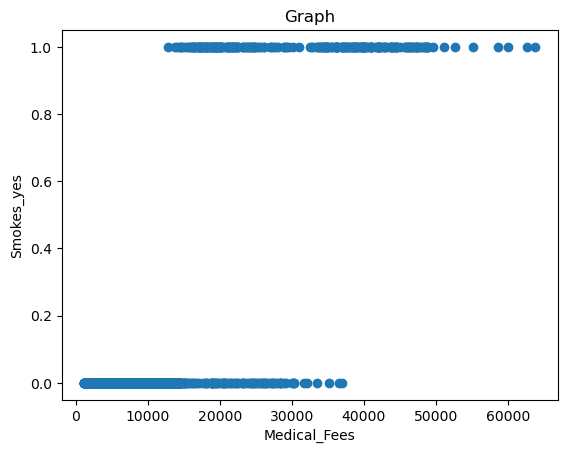

In [25]:
plt.scatter(df['Medical_Fees'], df['Smokes_yes'])
plt.xlabel('Medical_Fees')
plt.ylabel('Smokes_yes')
plt.title('Graph')
plt.show()

#### Remove Outliers

In [26]:
from sklearn.preprocessing import RobustScaler

In [33]:
filtered_df = df[df['Medical_Fees'] <= 58000]

,age,bmi,children,Medical_Fees,sex_female,Smokes_yes,Region
0,19,27.900,0,16884.92400,1,1,3
1,18,33.770,1,1725.55230,0,0,2
2,28,33.000,3,4449.46200,0,0,2
3,33,22.705,0,21984.47061,0,0,1
4,32,28.880,0,3866.85520,0,0,1
...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,0,1
1334,18,31.920,0,2205.98080,1,0,0
1335,18,36.850,0,1629.83350,1,0,2
1336,21,25.800,0,2007.94500,1,0,3


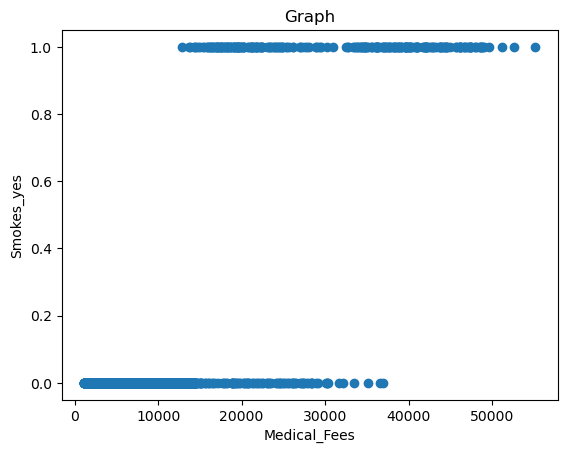

In [36]:
plt.scatter(filtered_df['Medical_Fees'],filtered_df['Smokes_yes'])
plt.xlabel('Medical_Fees')
plt.ylabel('Smokes_yes')
plt.title('Graph')
plt.show()

### Train a Model

In [74]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.exceptions import NotFittedError
from sklearn.pipeline import make_pipeline

In [43]:
X = df.drop(columns = ['Medical_Fees'])
y = df['Medical_Fees']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [65]:
pipelines = {
    "rf": make_pipeline(RandomForestRegressor(random_state=1234)),
    "gb": make_pipeline(GradientBoostingRegressor(random_state=1234)),
    "ridge": make_pipeline(Ridge(random_state=1234)),
    "lasso": make_pipeline(Lasso(random_state=1234)),
    "enet": make_pipeline(ElasticNet(random_state=1234)),
    "knn": make_pipeline(StandardScaler(), KNeighborsRegressor()),
    "svr": make_pipeline(StandardScaler(), SVR())
}

In [66]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [67]:
hypergrid = {
    'rf': {
        'randomforestregressor__min_samples_split': [2, 5, 10],
        'randomforestregressor__min_samples_leaf': [1, 2, 4],
    },
    'gb': {
        'gradientboostingregressor__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99],
    },
    'ridge': {
        'ridge__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'lasso': {
        'lasso__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'enet': {
        'elasticnet__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'knn': {
        'kneighborsregressor__n_neighbors': [3, 5, 7, 10],
    },
    'svr': {
        'svr__C': [0.1, 1, 10],
        'svr__gamma': [0.001, 0.01, 0.1, 1],
    }
}

In [68]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hypergrid[algo], cv=10, n_jobs=-1)
    try:
        print('Searching training for {}.'.format(algo))
        model.fit(X_train, y_train)
        fit_models[algo] = model
        print('{} has been successfully fit'.format(algo))
    except NotFittedError as e:
        print(repr(e))

Searching training for rf.
rf has been successfully fit
Searching training for gb.
gb has been successfully fit
Searching training for ridge.
ridge has been successfully fit
Searching training for lasso.
lasso has been successfully fit
Searching training for enet.
enet has been successfully fit
Searching training for knn.
knn has been successfully fit
Searching training for svr.
svr has been successfully fit


### Evaluate Models

In [75]:
for algo, model in fit_models.items():
    yhat = model.predict(X_test)
    print('{} scores - R2:{}, MAE:{}'.format(algo, r2_score(y_test, yhat), mean_absolute_error(y_test, yhat)))

rf scores - R2:0.8698746062359278, MAE:2498.0658005457735
gb scores - R2:0.8691716932972433, MAE:2432.217726854089
ridge scores - R2:0.7692107493627236, MAE:4167.664124343505
lasso scores - R2:0.7694413428431142, MAE:4155.564425709542
enet scores - R2:0.768823583081626, MAE:4184.791016980495
knn scores - R2:0.8291566577083755, MAE:3135.5247542736324
svr scores - R2:-0.030832790449367486, MAE:7901.8057262935745


### Select the Best Model

In [72]:
best_model = fit_models['gb']